# **Required Labraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# **Data Loading**

In [2]:
iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']=iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# **Actual Pairplot**

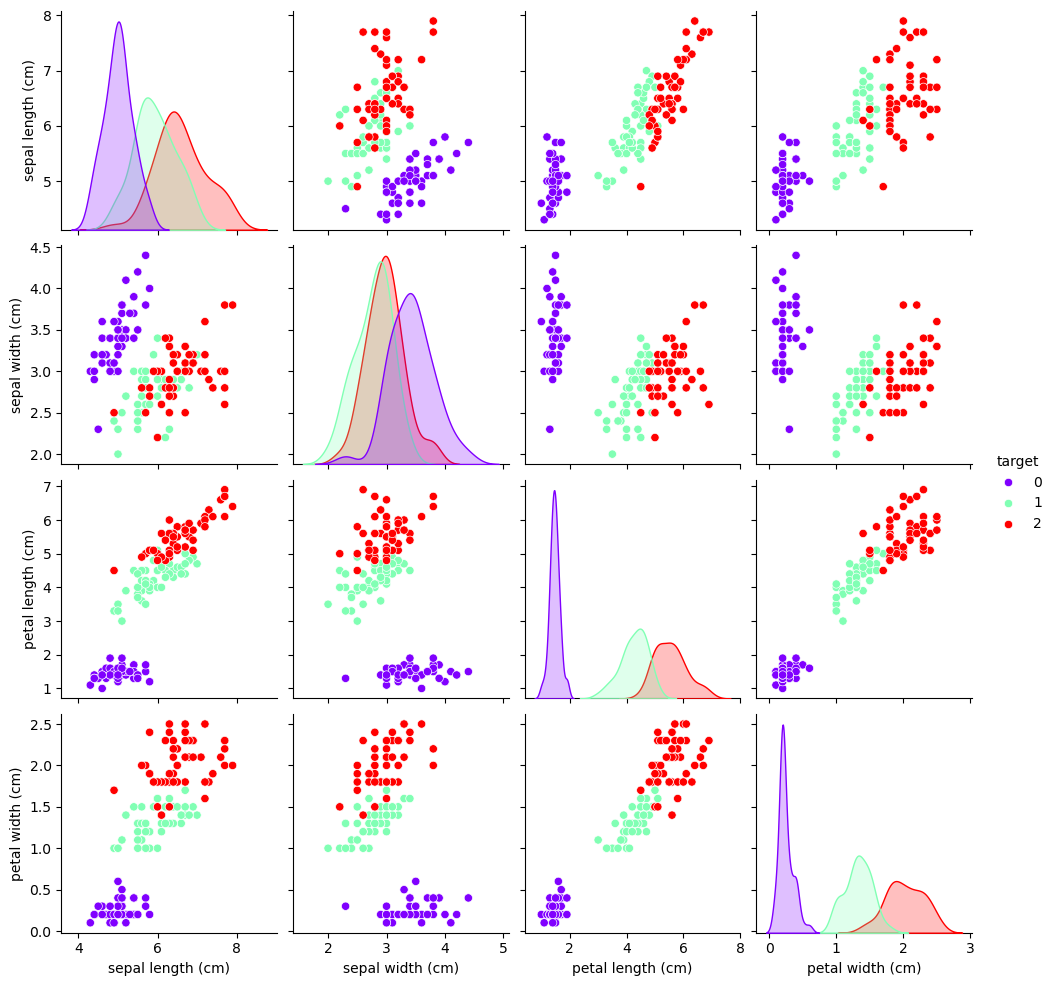

In [9]:
sns.pairplot(data=df, hue='target', palette='rainbow')
plt.savefig('Actual Pairplot.png', dpi=300)
plt.show()

# **Feature Scaling using StandardScaler**

In [7]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

# **Hierarchical Clustering and Dendrogram Visualization**


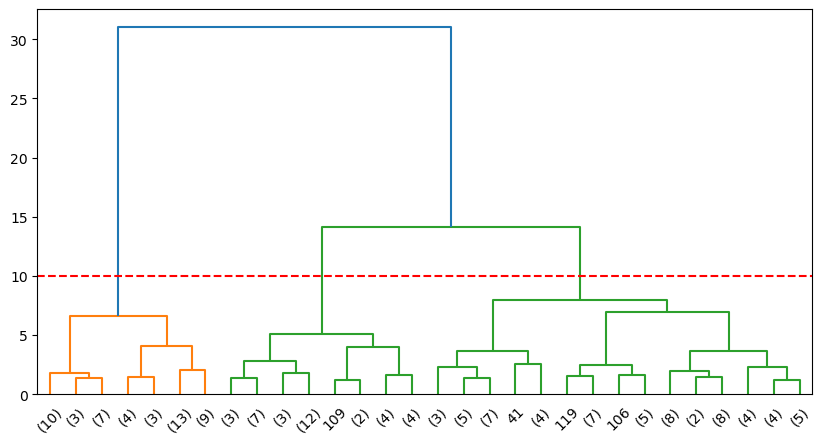

In [8]:
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode='lastp')
plt.axhline(y=10, color='r', linestyle='--')
plt.savefig('Dendrogram.png', dpi=300)
plt.show()

# **Applying Agglomerative Clustering**

In [10]:
ac=AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster']= ac.fit_predict(X_scaled)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


#  **Clusters of Iris Dataset (Petal Length vs Petal Width)**

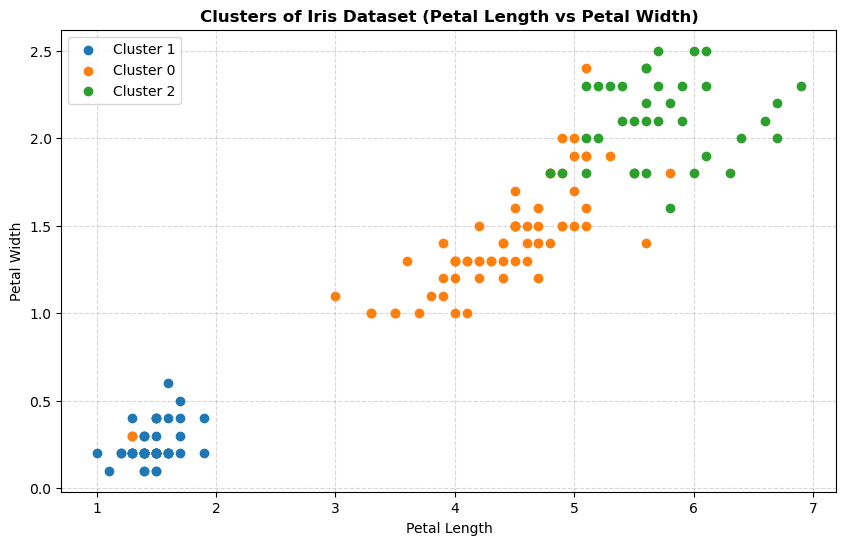

In [12]:
clusters = df['Cluster'].unique()
plt.figure(figsize=(10,6))
for cluster in clusters:
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['petal length (cm)'], 
                cluster_data['petal width (cm)'], 
                label=f"Cluster {cluster}", zorder=3)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Clusters of Iris Dataset (Petal Length vs Petal Width)", fontweight='bold')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.savefig('Clusters of Iris Dataset (Petal Length vs Petal Width)',dpi=300)        
plt.show()


# **Visualizing Clusters with Pair Plot**

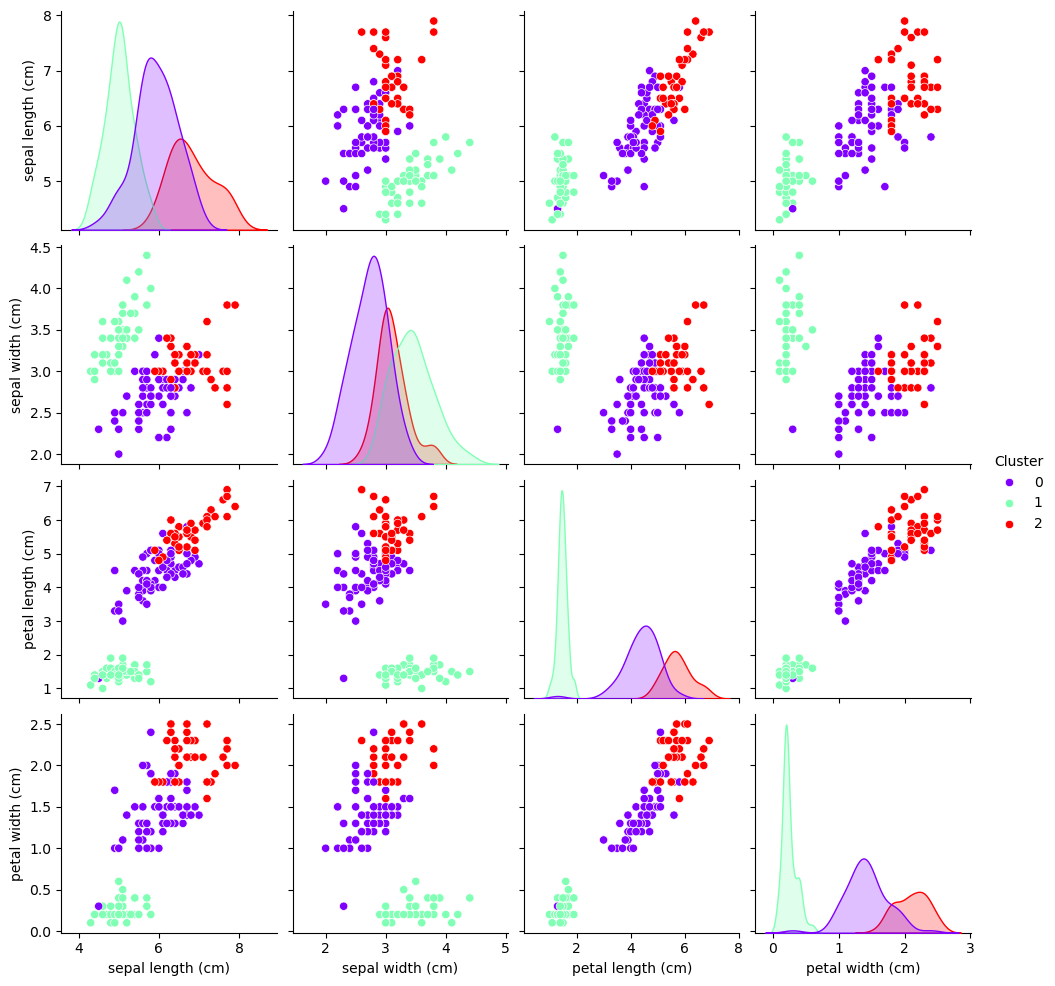

In [15]:
import warnings
warnings.filterwarnings("ignore")
pair=df.drop('target', axis=1)
sns.pairplot(data=pair, hue='Cluster', palette='rainbow')
plt.savefig('Visualizing Clusters with Pair Plot',dpi=300)
plt.show()